✅ Data Loaded | Shape: (9612, 36)


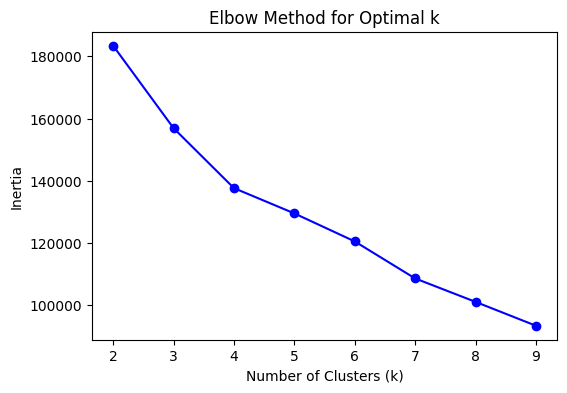

🔹 Using 3 clusters


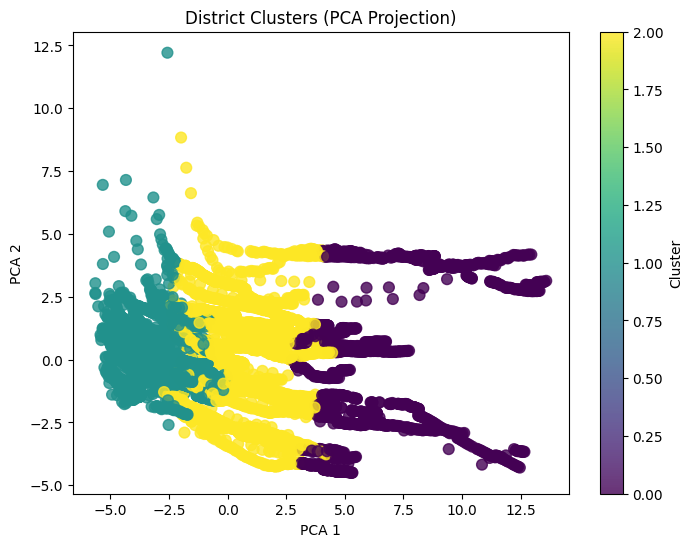


📊 Cluster Summary:
          state_code  district_code  Approved_Labour_Budget  \
Cluster                                                      
0              18.0        1823.26              5442558.81   
1              18.0        1815.08               636770.20   
2              18.0        1820.89              1832824.79   

         Average_Wage_rate_per_day_per_person  \
Cluster                                         
0                                      276.47   
1                                      308.88   
2                                      290.69   

         Average_days_of_employment_provided_per_Household  \
Cluster                                                      
0                                                    47.98   
1                                                    28.03   
2                                                    32.66   

         Differently_abled_persons_worked  Material_and_skilled_Wages  \
Cluster                               

In [2]:
# ============================================
# 🌟 District Performance Clustering Script
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 1️⃣ Load Dataset
data = pd.read_csv("..\\data\\combined.csv")   # <-- change to your CSV path
print(f"✅ Data Loaded | Shape: {data.shape}")

# 2️⃣ Clean + Select Numeric Features
exclude_cols = [
    'fin_year', 'month', 'state_code', 'state_name',
    'district_code', 'district_name', 'Remarks'
]

numeric_data = data.drop(columns=exclude_cols, errors='ignore')
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')
numeric_data.fillna(numeric_data.median(), inplace=True)

# 3️⃣ Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# 4️⃣ Find Optimal k (Elbow Method)
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-', color='blue')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# 👉 Choose k based on elbow manually OR auto-select (example: 3)
optimal_k = 3
print(f"🔹 Using {optimal_k} clusters")

# 5️⃣ Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# 6️⃣ Visualize with PCA (2D Projection)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis', s=60, alpha=0.8)
plt.title("District Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

# 7️⃣ Summary & Insights
summary = data.groupby('Cluster').mean(numeric_only=True).round(2)
print("\n📊 Cluster Summary:\n", summary)

# 8️⃣ Save Clustered Data
data.to_csv("clustered_districts.csv", index=False)
print("\n✅ Clustered data saved as 'clustered_districts.csv'")


| Cluster                            | Summary                                                                                                 |
| ---------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **Cluster 0 – High Performer**     | Large budgets, high employment, more works completed, faster payments. Strong MGNREGA execution.        |
| **Cluster 1 – Low Performer**      | Low budgets, fewer projects, low employment days, less expenditure — needs intervention and monitoring. |
| **Cluster 2 – Moderate Performer** | Medium budgets, balanced performance, could improve efficiency and resource utilization.                |


| Cluster       | Key Pattern                                                                                                                                                                                          | What it Represents                                                                                                                                                                                        |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | 💰 **High budget & high expenditure districts**<br>- `Approved_Labour_Budget`: ~5.4M<br>- `Total_Exp`: 10,717<br>- `Wages`: 17,766<br>- `Average employment days`: 48<br>- `Works completed`: 11,069 | **High-performing / resource-rich districts** — they have more projects, higher spending, and higher wage distribution. Likely **core or developed areas** where MGNREGA activities are well-established. |
| **Cluster 1** | ⚠️ **Low-budget, low-performance districts**<br>- `Approved_Labour_Budget`: ~0.63M<br>- `Total_Exp`: 5,665<br>- `Works completed`: 2,842<br>- `Average employment days`: 28                          | **Lagging districts** — low labour budgets, fewer works completed, and lower employment. Possibly rural or underdeveloped areas with poor fund utilization or project execution.                          |
| **Cluster 2** | ⚙️ **Moderate districts (middle performers)**<br>- `Approved_Labour_Budget`: ~1.8M<br>- `Total_Exp`: 10,717<br>- `Average employment days`: 32<br>- `Works completed`: 6,293                         | **Medium-performing / balanced districts** — average fund usage, moderate employment generation, performing decently but not outstanding.                                                                 |



| Feature                                             | Cluster 0 | Cluster 1 | Cluster 2 | Interpretation                                                  |
| --------------------------------------------------- | --------- | --------- | --------- | --------------------------------------------------------------- |
| `Approved_Labour_Budget`                            | 5.4M      | 0.63M     | 1.8M      | Cluster 0 has the largest budgets → richer districts.           |
| `Average_days_of_employment_provided_per_Household` | 48        | 28        | 32        | Cluster 0 creates longer employment — better program delivery.  |
| `Total_Exp`                                         | 10,717    | 5,665     | 10,717    | High expenditure = high activity in Cluster 0.                  |
| `Number_of_Completed_Works`                         | 11,069    | 2,842     | 6,293     | Cluster 0 is most efficient; Cluster 1 lags.                    |
| `Women_Persondays`                                  | 3.1M      | 0.3M      | 1.07M     | Cluster 0 promotes women’s participation most.                  |
| `percent_of_NRM_Expenditure`                        | 9.12      | 2.57      | 8.46      | Cluster 1 is not investing much in Natural Resource Management. |
| `percentage_payments_gererated_within_15_days`      | 131.7     | 103.3     | 105.7     | Cluster 0 ensures faster wage payments (system efficiency).     |
